<center><h1>Crimes in Vancouver</h1></center>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

%matplotlib inline
sns.set_style('whitegrid')

In [6]:
crime_vancouver = pd.read_csv('crime_csv_all_years.csv')

In [7]:
crime_vancouver.columns = crime_vancouver.columns.str.lower()

In [8]:
crime_vancouver.describe()

,year,month,day,hour,minute,x,y
count,604815.000000,604815.000000,604815.000000,544154.000000,544154.000000,604815.000000,6.048150e+05
mean,2010.272381,6.466991,15.393985,13.723303,17.080459,442860.853025,4.909417e+06
std,5.020556,3.414385,8.749439,6.751286,18.452316,147886.179955,1.639172e+06
min,2003.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,2006.000000,4.000000,8.000000,9.000000,0.000000,490007.400000,5.453752e+06
50%,2010.000000,6.000000,15.000000,15.000000,11.000000,491525.980000,5.456899e+06
75%,2015.000000,9.000000,23.000000,19.000000,30.000000,493497.925000,5.458678e+06
max,2019.000000,12.000000,31.000000,23.000000,59.000000,511303.000000,5.512579e+06


In [9]:
crime_vancouver.isnull().sum()

type                 0
year                 0
month                0
day                  0
hour             60661
minute           60661
hundred_block       13
neighbourhood    63100
x                    0
y                    0
dtype: int64

## Types of crimes in Vancouver

In [1]:
crime_vancouver['type'].value_counts()

NameError: name 'crime_vancouver' is not defined

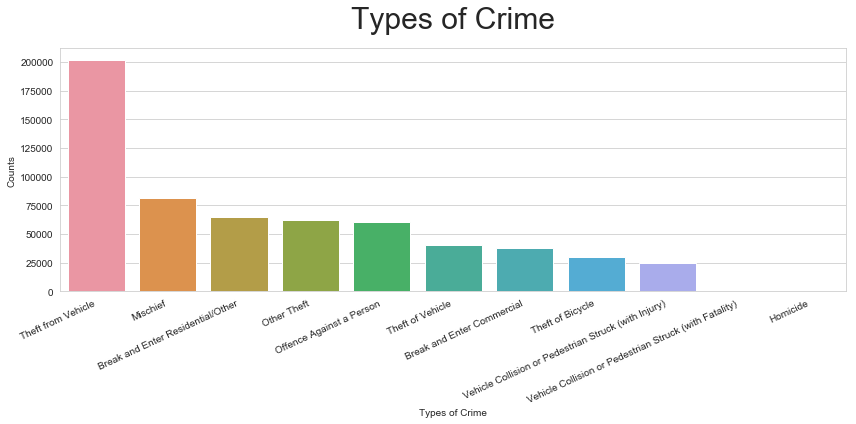

In [13]:
plt.figure(figsize=(12,6))
plt.title('Types of Crime',fontdict={'fontsize':'30'},pad=20)
ax = sns.countplot(x='type',data=crime_vancouver, order = crime_vancouver['type'].value_counts().index)
ax.set(xlabel='Types of Crime')
ax.set(ylabel='Counts')
plt.setp(ax.get_xticklabels(), rotation=25, horizontalalignment='right')
plt.tight_layout()

<div class="alert alert-info" role="alert">
<h3>Top 3 types of crimes in Vancouver are:</h3>
<ol>
    <li>Theft from Vehicle</li>
    <li>Mischief</li>
    <li>Break and Enter Residentail/Other</li>
</ol>
</div>

## Trends over the years

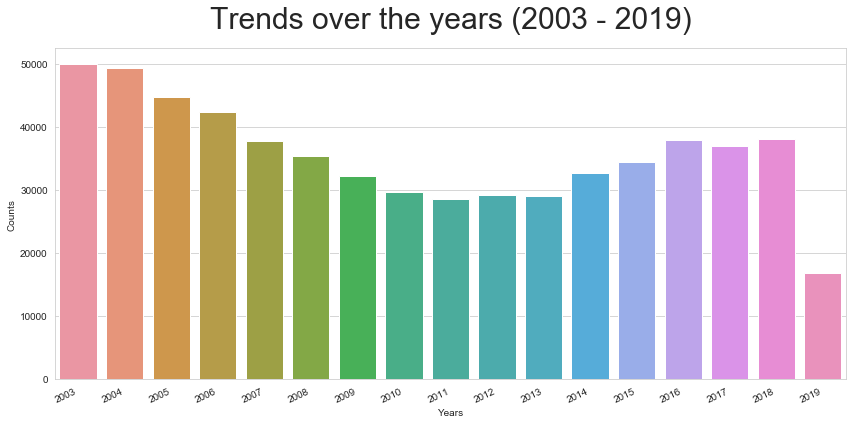

In [17]:
plt.figure(figsize=(12,6))
plt.title('Trends over the years (2003 - 2019)',fontdict={'fontsize':'30'},pad=20)
ax = sns.countplot(x='year',data=crime_vancouver)
ax.set(xlabel='Years', ylabel='Counts')
plt.setp(ax.get_xticklabels(), rotation=25, horizontalalignment='right')
plt.tight_layout()

<div class="alert alert-info" role="alert">
From the year 2003 to 2017 and the trends shows decresase in crime rate over the period.
</div>

## Safest area in Vancouver

In [22]:
crime_vancouver['counter'] = 1
safe_region = crime_vancouver.groupby(['neighbourhood']).count()['counter'].sort_values(ascending=True).head(5)
safe_region

neighbourhood
Musqueam            568
Stanley Park       4097
South Cambie       5838
Shaughnessy        6185
West Point Grey    6569
Name: counter, dtype: int64

## Dangerous area in Vancouver

In [23]:
danger_region = crime_vancouver.groupby(['neighbourhood']).count()['counter'].sort_values(ascending=False).head(5)
danger_region

neighbourhood
Central Business District    131962
West End                      47202
Fairview                      35802
Mount Pleasant                35115
Grandview-Woodland            30746
Name: counter, dtype: int64

# Months having highest crime rate

In [27]:
months = crime_vancouver.groupby(['month','day']).count()['counter'].sort_values(ascending=False).head(5)
months

month  day
6      15     2298
1      1      2202
5      15     1949
10     31     1942
11     1      1923
Name: counter, dtype: int64

# Days having highest crime rate

In [30]:
crime_vancouver.groupby(['day']).count()['counter'].sort_values(ascending=False).head(5)

day
1     22341
15    21957
12    20971
14    20851
13    20740
Name: counter, dtype: int64

# Time having highest crime rate

In [31]:
crime_vancouver.groupby(['hour']).count()['counter'].sort_values(ascending=False).head(5)

hour
18.0    41454
17.0    36312
19.0    34167
22.0    32660
20.0    31940
Name: counter, dtype: int64